In [42]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)

<module 'honeycomb_plot' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/honeycomb_plot.py'>

In [43]:
Npx = 2 # Number of plaquette in each dimension
Npy = 1
model = site.SitesProtBonds(Npx, Npy)

In [44]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nyrows)
print(model.partition)

Number of sites: 14
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
5
6
4
['A' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'B']


In [45]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[1 0]
 [3 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [1 3]
 [3 3]]


In [46]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
(3, 1)


In [47]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bonds = model.get_diagonalbonds()[0]

In [48]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bonds: ", np.array(diagonal_bonds))


xx_bond:  [[ 2  3]
 [ 4  5]
 [ 8  9]
 [10 11]]
yy_bond:  [[ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]]
zz_bond:  [[ 0  3]
 [ 1  5]
 [ 2  7]
 [ 4  9]
 [ 6 11]
 [10 13]
 [ 8 12]]
diagonal_bonds:  [2 9]


In [49]:
coords = model.get_coordinates()
print(coords)

[[ 0.8660254   1.5       ]
 [ 2.59807621  1.5       ]
 [ 0.         -0.        ]
 [ 0.8660254   0.5       ]
 [ 1.73205081 -0.        ]
 [ 2.59807621  0.5       ]
 [ 3.46410162 -0.        ]
 [ 0.         -1.        ]
 [ 0.8660254  -1.5       ]
 [ 1.73205081 -1.        ]
 [ 2.59807621 -1.5       ]
 [ 3.46410162 -1.        ]
 [ 0.8660254  -2.5       ]
 [ 2.59807621 -2.5       ]]


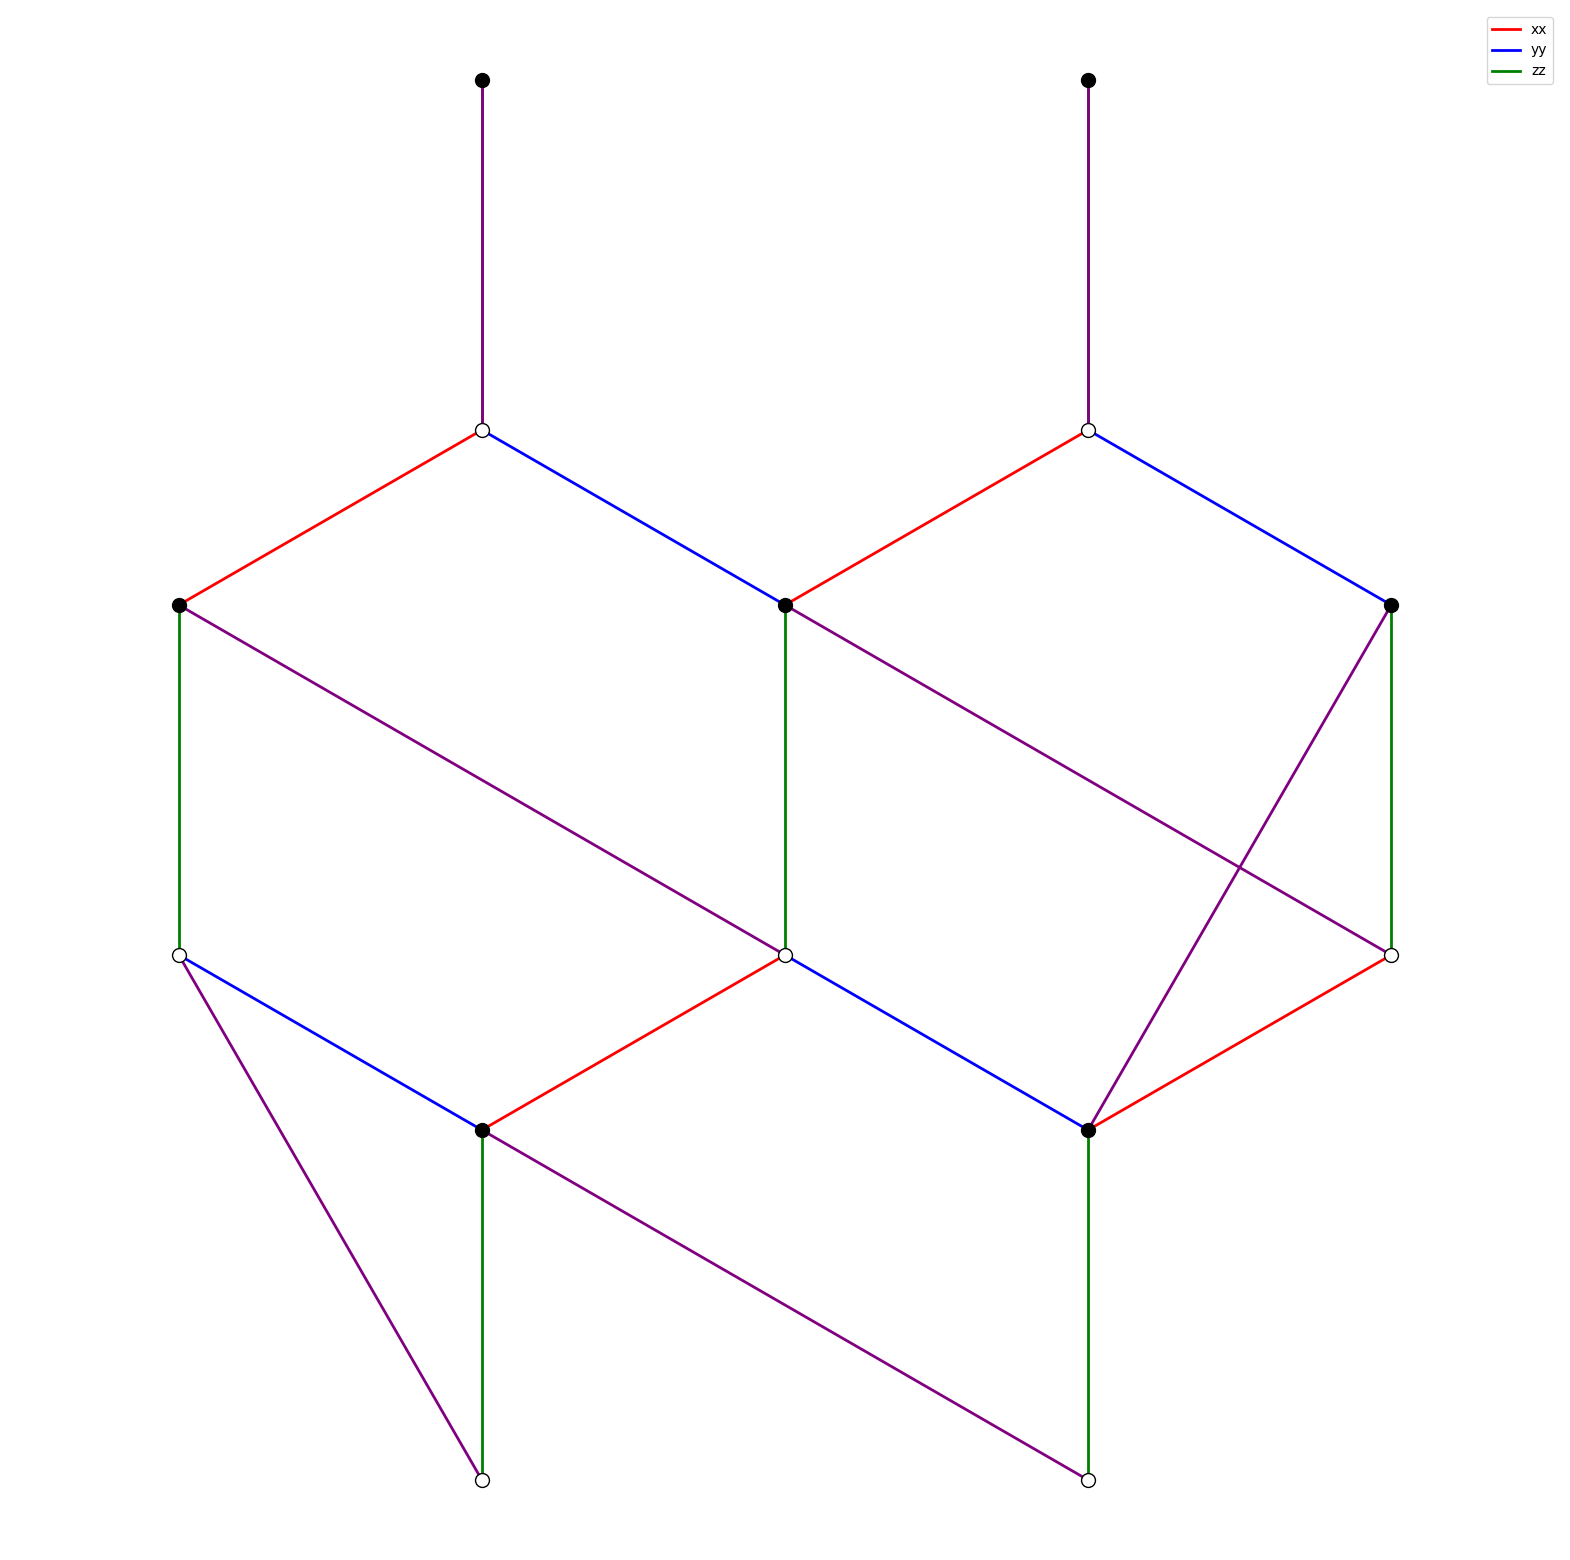

In [50]:
modell = site.SitesProtBonds(Npx = 2, Npy = 1, edge = True)


honey.plot_honeycomb(modell,
                     plot_anyon_bonds=False,
                     plot_diagonal_bonds=True)


6


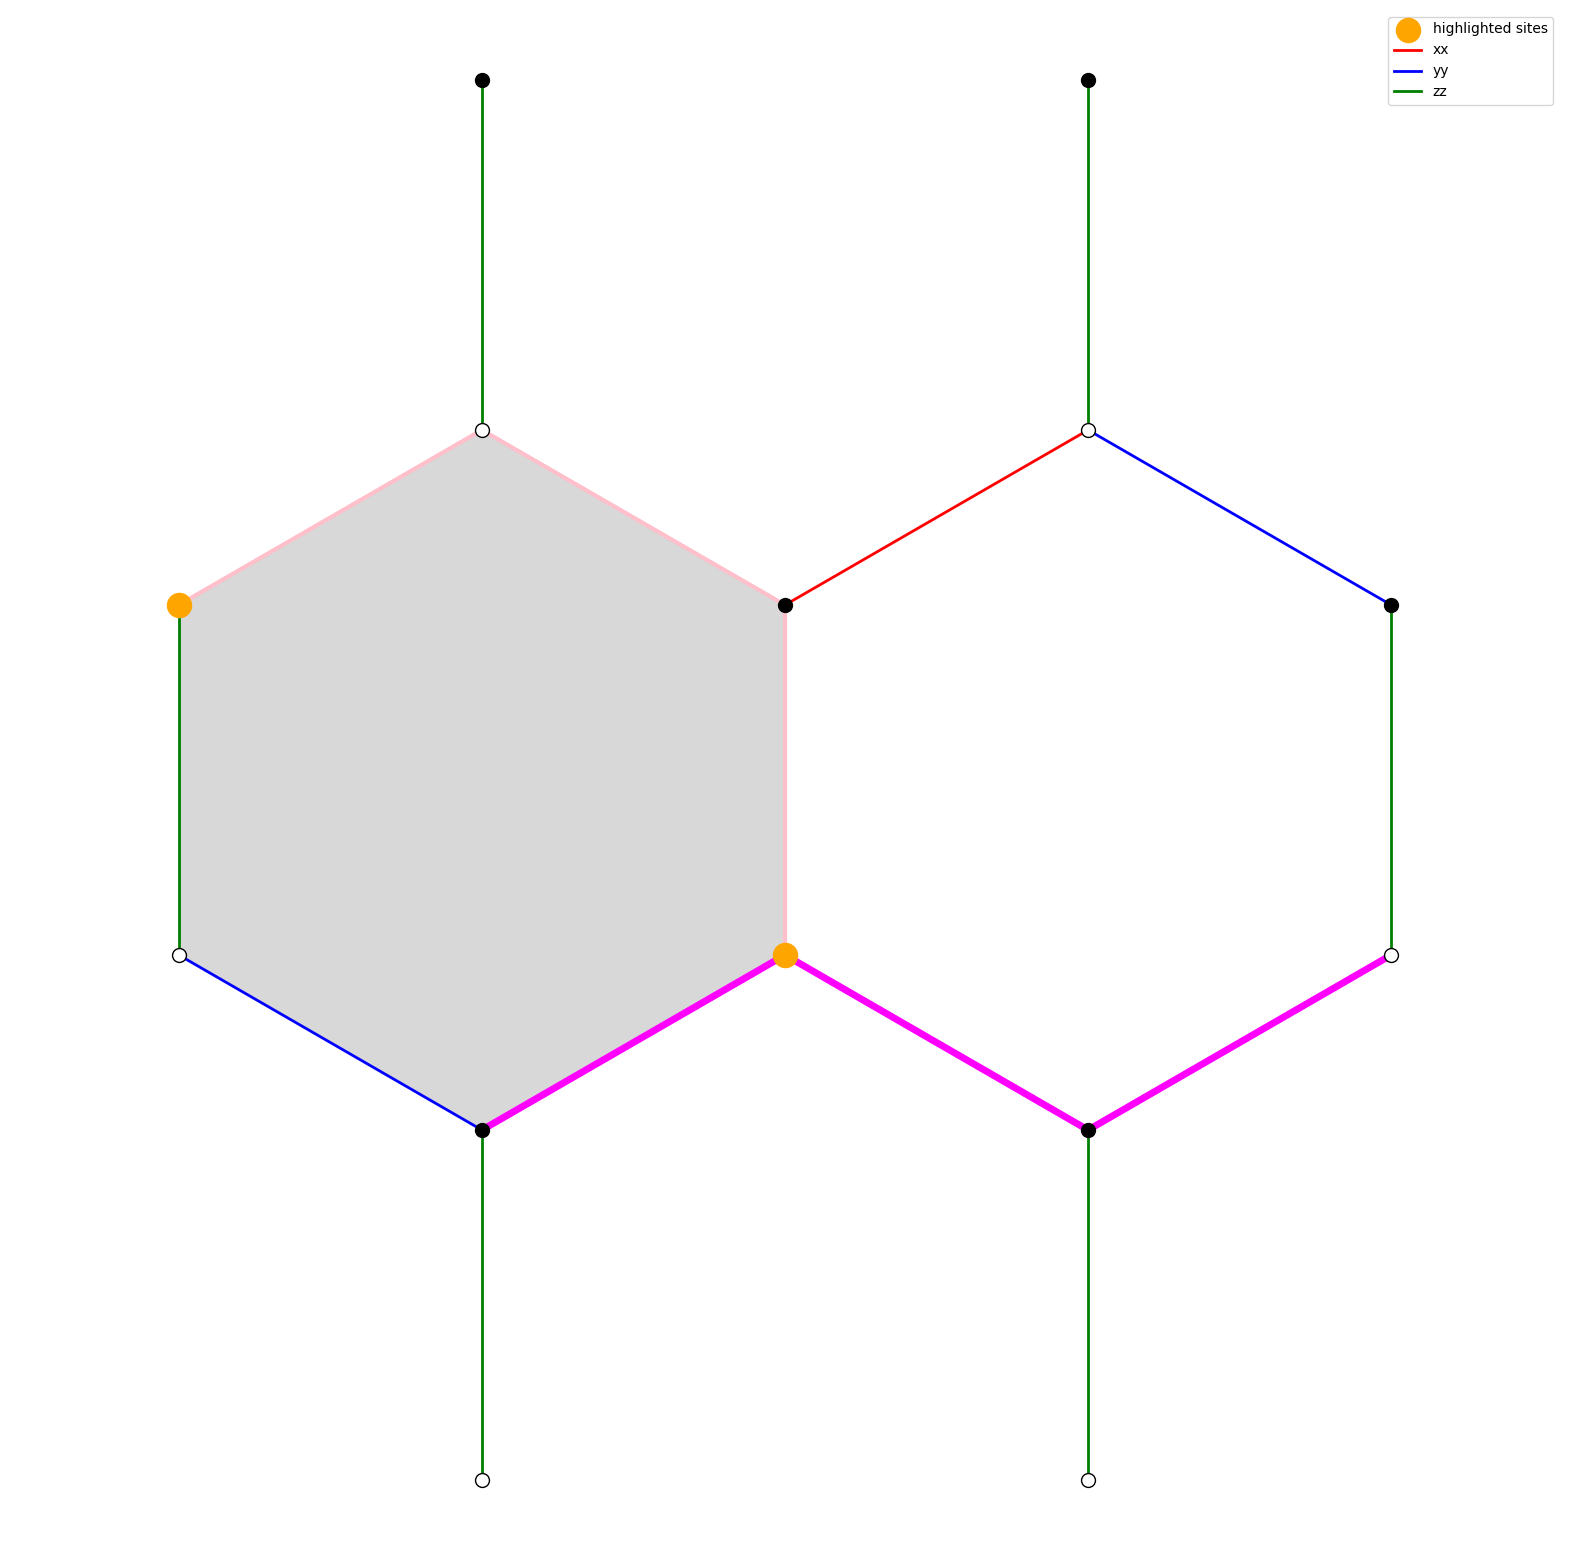

In [51]:
modell = site.SitesProtBonds(Npx = 2, Npy = 1, index = 3)


prefactor, loop_indices, links_list = modell.get_small_loop()
anyon_bonds, central_plaquette, _, _ = modell.get_anyonbonds()
print(central_plaquette)
honey.plot_honeycomb(modell, 
                    plot_anyon_bonds = True,
                    sites = loop_indices, 
                    # loop = True,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list)

In [38]:
import free_fermion_representation as f
importlib.reload(f)

<module 'free_fermion_representation' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/free_fermion_representation.py'>

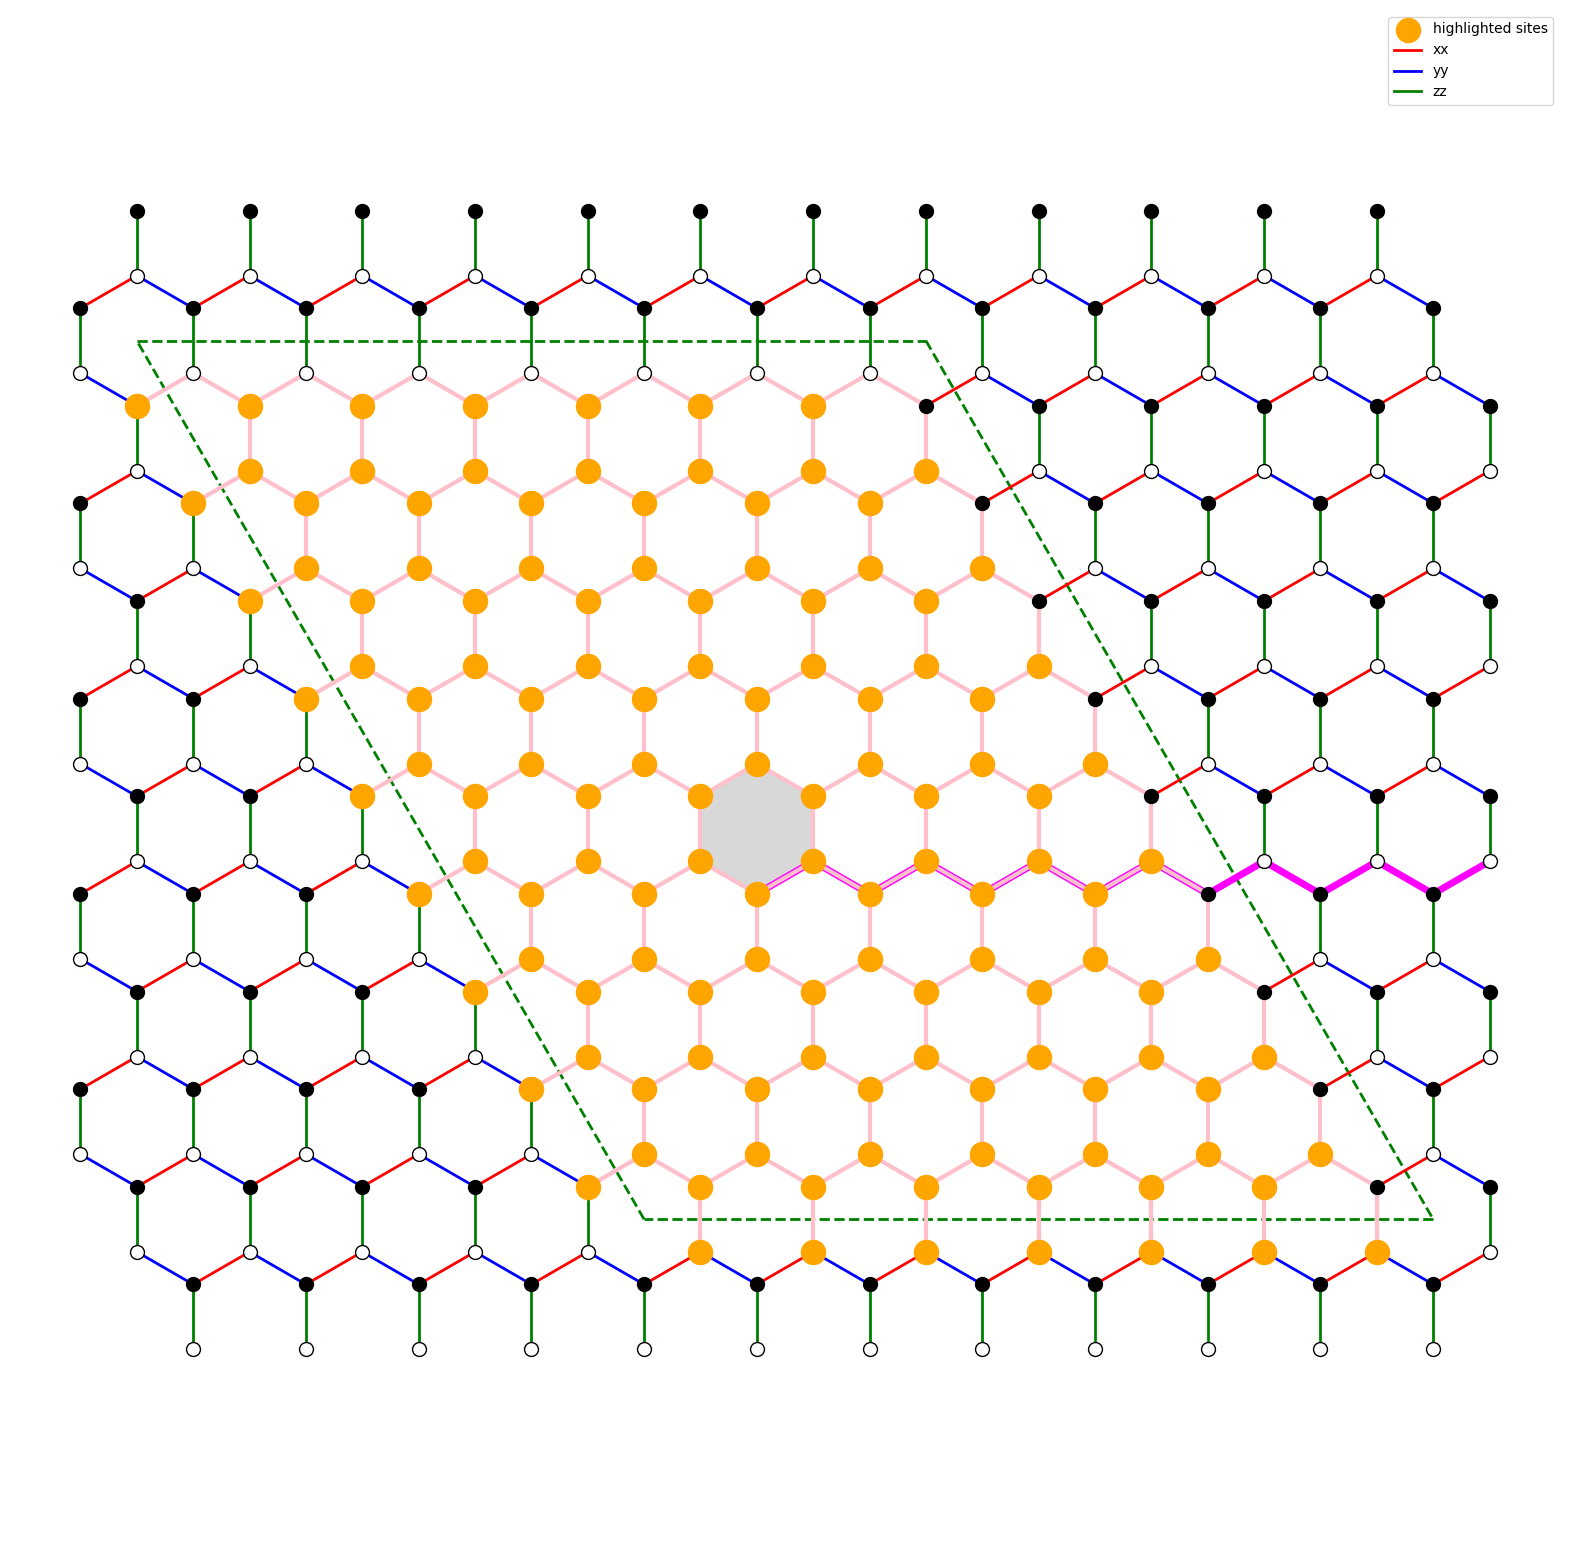

In [ ]:
model = site.SitesProtBonds(Npx=12, Npy=10, index=None)
fgs = f.FermionicGaussianRepresentation(model)

prefactor, loop_indices, links_list, _ = model.get_loop()

central_plaquette = model.get_anyonbonds()[1]

honey.plot_honeycomb(model, plot_anyon_bonds = True,
                    sites = loop_indices, 
                    loop = True,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list)


In [15]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

T = 0.8
# t = T*np.pi/4.
Rex, Rey, Rez, Re = fgs.floquet_operator_ham(T)
R0x, R0y, R0z, R0 = fgs.floquet_operator_ham(T)

N = 10 

upper_sum_0 = []
upper_sum_e = []
exp_value = []

exp_value.append(fgs.expectation_value_loop())
upper_sum_0.append(np.sum(np.triu(fgs.Cov_0, k=1)))
upper_sum_e.append(np.sum(np.triu(fgs.Cov_e, k=1)))

for i in range(N):
    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_e_matrix(Re)
    upper_sum_0.append(np.sum(np.triu(fgs.Cov_0, k=1)))
    upper_sum_e.append(np.sum(np.triu(fgs.Cov_e, k=1)))
    exp_value.append(fgs.expectation_value_loop()[1])


print(upper_sum_0)
print()
print(upper_sum_e)
print()
print(exp_value)





[np.complex128(119+0j), np.complex128(150.57388058623815+0j), np.complex128(107.77148407363148+0j), np.complex128(84.83838220046789+0j), np.complex128(81.71294082347664+0j), np.complex128(95.70593670765173+0j), np.complex128(88.42624900002163+0j), np.complex128(80.71358161532902+0j), np.complex128(73.80240913412406+0j), np.complex128(110.31883348485768+0j), np.complex128(99.23988615316587+0j)]

[np.complex128(119+0j), np.complex128(150.57388058623815+0j), np.complex128(107.77148407363148+0j), np.complex128(84.83838220046789+0j), np.complex128(81.71294082347664+0j), np.complex128(95.70593670765173+0j), np.complex128(88.42624900002163+0j), np.complex128(80.71358161532902+0j), np.complex128(73.80240913412406+0j), np.complex128(110.31883348485768+0j), np.complex128(99.23988615316587+0j)]

[(np.complex128(1-0j), np.complex128(1-0j)), np.complex128(0.032677989249587494-0j), np.complex128(0.0184196851828033-0j), np.complex128(0.020463915847425206-0j), np.complex128(0.007226347558036172-0j), n

Text(0.5, 1.0, 'Measurement of Loop operator O under Floquet drive')

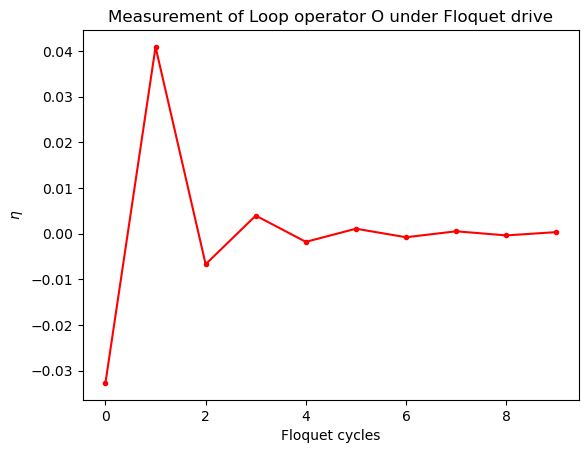

In [ ]:
plt.plot(range(N), exp_value[1:], '.-', color='red')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title("Measurement of Loop operator O under Floquet drive")